# 0. Instalacion de utilitarios Pyspark

In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://www-us.apache.org/dist/spark/spark-2.3.4/spark-2.3.4-bin-hadoop2.7.tgz
!tar xf spark-2.3.4-bin-hadoop2.7.tgz

In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://www-us.apache.org/dist/spark/spark-2.4.4/spark-2.4.4-bin-hadoop2.7.tgz
!tar xf spark-2.4.4-bin-hadoop2.7.tgz

In [ ]:
!pip install -q findspark

In [ ]:
pwd

'/content'

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.4-bin-hadoop2.7"


In [ ]:
!pip install pyspark

     |████████████████████████████████| 215.7MB 59kB/s 
     |████████████████████████████████| 204kB 47.5MB/s 
  Created wheel for pyspark: filename=pyspark-2.4.4-py2.py3-none-any.whl size=216130387 sha256=0c068d0a085c03d277abba35c7479db62d8641a9c10530ee44a8bb92856ec96b
  Stored in directory: /root/.cache/pip/wheels/ab/09/4d/0d184230058e654eb1b04467dbc1292f00eaa186544604b471
Successfully built pyspark


In [ ]:
!export PYSPARK_SUBMIT_ARGS="--master local[2] pyspark-shell"

In [ ]:
from pyspark.sql import SparkSession
from pyspark import SparkContext

spark = SparkSession.builder.master("local").getOrCreate()
sc = SparkContext.getOrCreate()

# 1. Lectura del origen datos

In [ ]:
# Lectura desde un archivo fisico
#from google.colab import files
#uploaded = files.upload()

In [ ]:

# Conexion al drive
#---------------------------
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
ls "/content/drive/My Drive/PySpark Machine Learning en plataforma Big Data/Training R ML en Casos de Negocios/8_Recomendacion_comercio"


'Caso de recomendacion tipo rappi.pptx'
 Comercio_tipo_rappi.csv
 Comercio_tipo_rappi.gsheet
'PySpark tutorial – a case study using Random Forest on unbalanced dataset – Weimin Wang.url'
'Solucion_CASO_DELIVERY_MEXICO (1).ipynb'


#2.  Cargando los datos en formato Spark

In [ ]:
DS_peliculas_rating = spark.read.csv(
    '/content/drive/My Drive/PySpark Machine Learning en plataforma Big Data/Training R ML en Casos de Negocios/8_Recomendacion_comercio/Comercio_tipo_rappi.csv', 
    sep=';',
    header=True, 
    inferSchema=True
)

DS_peliculas_rating.printSchema()

root
 |-- userID: string (nullable = true)
 |-- userID_cod: integer (nullable = true)
 |-- placeID: integer (nullable = true)
 |-- Nombre_comerce: string (nullable = true)
 |-- Distrito: string (nullable = true)
 |-- rating: integer (nullable = true)
 |-- food_rating: integer (nullable = true)
 |-- service_rating: integer (nullable = true)
 |-- rating_total: integer (nullable = true)



In [ ]:
# Dimensiona de base
print(
    DS_peliculas_rating.count(),
    len(DS_peliculas_rating.columns)
)

50766 9


In [ ]:
# 2.2 Revisiones  
DS_peliculas_rating.show(5)

+------+----------+-------+--------------------+---------------+------+-----------+--------------+------------+
|userID|userID_cod|placeID|      Nombre_comerce|       Distrito|rating|food_rating|service_rating|rating_total|
+------+----------+-------+--------------------+---------------+------+-----------+--------------+------------+
| U1077|         1| 135085|Tortas Locas Hipo...|San Luis Potosi|     2|          2|             2|           6|
| U1077|         1| 135038|Restaurant la Cha...|San Luis Potosi|     2|          2|             1|           5|
| U1077|         1| 132825|     puesto de tacos|         s.l.p.|     2|          2|             2|           6|
| U1077|         1| 135060|Restaurante Maris...|San Luis Potosi|     1|          2|             2|           5|
| U1068|         2| 135104|                vips|              0|     1|          1|             2|           4|
+------+----------+-------+--------------------+---------------+------+-----------+--------------+------

In [ ]:
from pyspark.sql.functions import udf
from slugify import slugify

@udf('string')
def apply_slug(_val):
  return slugify(str(_val)).replace('-', '')

DS_peliculas_rating = DS_peliculas_rating.withColumn(
    'Distrito', apply_slug(DS_peliculas_rating.Distrito)
)
DS_peliculas_rating.show(5)

+------+----------+-------+--------------------+-------------+------+-----------+--------------+------------+
|userID|userID_cod|placeID|      Nombre_comerce|     Distrito|rating|food_rating|service_rating|rating_total|
+------+----------+-------+--------------------+-------------+------+-----------+--------------+------------+
| U1077|         1| 135085|Tortas Locas Hipo...|sanluispotosi|     2|          2|             2|           6|
| U1077|         1| 135038|Restaurant la Cha...|sanluispotosi|     2|          2|             1|           5|
| U1077|         1| 132825|     puesto de tacos|          slp|     2|          2|             2|           6|
| U1077|         1| 135060|Restaurante Maris...|sanluispotosi|     1|          2|             2|           5|
| U1068|         2| 135104|                vips|            0|     1|          1|             2|           4|
+------+----------+-------+--------------------+-------------+------+-----------+--------------+------------+
only showi

In [ ]:
list(DS_peliculas_rating.select('Distrito').toPandas()['Distrito'].unique())

['sanluispotosi',
 'slp',
 '0',
 'ciudadvictoria',
 'victoria',
 'cdvictoria',
 'cuernavaca',
 'jiutepec',
 'soledad',
 'sanluispotos']

In [ ]:
# 2.3 Validacion de carga del total de registros
print(DS_peliculas_rating.count())

50766


In [ ]:
discart_potosi = ['sanluispotosi', 'sanluispotos', 'slp']
DS_peliculas_rating = DS_peliculas_rating.filter(DS_peliculas_rating.Distrito.isin(*discart_potosi) == False)
DS_peliculas_rating.show(5)

+------+----------+-------+--------------------+--------------+------+-----------+--------------+------------+
|userID|userID_cod|placeID|      Nombre_comerce|      Distrito|rating|food_rating|service_rating|rating_total|
+------+----------+-------+--------------------+--------------+------+-----------+--------------+------------+
| U1068|         2| 135104|                vips|             0|     1|          1|             2|           4|
| U1068|         2| 132740|Carreton de Flaut...|ciudadvictoria|     0|          0|             0|           0|
| U1068|         2| 132663|           tacos abi|      victoria|     1|          1|             1|           3|
| U1068|         2| 132732|  Taqueria EL amigo |    cdvictoria|     0|          0|             0|           0|
| U1068|         2| 132630|          palomo tec|      victoria|     1|          1|             1|           3|
+------+----------+-------+--------------------+--------------+------+-----------+--------------+------------+
o

In [ ]:
print(DS_peliculas_rating.count())

13119


In [ ]:
list(DS_peliculas_rating.select('Distrito').toPandas()['Distrito'].unique())

['0',
 'ciudadvictoria',
 'victoria',
 'cdvictoria',
 'cuernavaca',
 'jiutepec',
 'soledad']

In [ ]:
vic_city = ['ciudadvictoria', 'victoria', 'cdvictoria']
@udf('string')
def victoria_detected(_val):
  return 'CiudadVictoria' if _val in vic_city else _val

DS_peliculas_rating = DS_peliculas_rating.withColumn(
    'Distrito', victoria_detected(DS_peliculas_rating.Distrito)
)
DS_peliculas_rating.show()

+------+----------+-------+--------------------+--------------+------+-----------+--------------+------------+
|userID|userID_cod|placeID|      Nombre_comerce|      Distrito|rating|food_rating|service_rating|rating_total|
+------+----------+-------+--------------------+--------------+------+-----------+--------------+------------+
| U1068|         2| 135104|                vips|             0|     1|          1|             2|           4|
| U1068|         2| 132740|Carreton de Flaut...|CiudadVictoria|     0|          0|             0|           0|
| U1068|         2| 132663|           tacos abi|CiudadVictoria|     1|          1|             1|           3|
| U1068|         2| 132732|  Taqueria EL amigo |CiudadVictoria|     0|          0|             0|           0|
| U1068|         2| 132630|          palomo tec|CiudadVictoria|     1|          1|             1|           3|
| U1067|         3| 132584|  Gorditas Dona Tota|             0|     2|          2|             2|           6|
|

In [ ]:
# 2.4 Exploracion inicial
DS_peliculas_rating.describe().show()

+-------+------+-----------------+------------------+---------------+--------+------------------+------------------+------------------+------------------+
|summary|userID|       userID_cod|           placeID| Nombre_comerce|Distrito|            rating|       food_rating|    service_rating|      rating_total|
+-------+------+-----------------+------------------+---------------+--------+------------------+------------------+------------------+------------------+
|  count| 13119|            13119|             13119|          13119|   13119|             13119|             13119|             13119|             13119|
|   mean|  null|51.04619254516351|133677.19262138882|           null|     0.0|1.1938409939781995|1.2661788246055339|1.1077826053815076| 3.567802423965241|
| stddev|  null| 41.1619557622561|1124.8149505528338|           null|     0.0|0.7735755590925539|0.8150561188889777|0.7956082473835119|2.1526484597726867|
|    min| U1001|                2|            132560|Arrachela Grill| 

In [ ]:
list(DS_peliculas_rating.select('Distrito').toPandas()['Distrito'].unique())

['0', 'CiudadVictoria', 'cuernavaca', 'jiutepec', 'soledad']

In [ ]:
# 2.5 Los clientes que más vistaron la plataforma de videos
DS_peliculas_rating.groupBy('userId').count().orderBy('count',ascending=False).show(10,False)

+------+-----+
|userId|count|
+------+-----+
|U1133 |423  |
|U1082 |401  |
|U1093 |392  |
|U1030 |392  |
|U1123 |360  |
|U1103 |360  |
|U1035 |348  |
|U1042 |305  |
|U1118 |301  |
|U1100 |294  |
+------+-----+
only showing top 10 rows



In [ ]:
# 2.6  Las clientes que menos vieron las peliculas
DS_peliculas_rating.groupBy('userId').count().orderBy('count',ascending=True).show(10,False)

+------+-----+
|userId|count|
+------+-----+
|U1136 |19   |
|U1049 |20   |
|U1057 |20   |
|U1112 |20   |
|U1088 |35   |
|U1001 |35   |
|U1081 |35   |
|U1092 |38   |
|U1098 |38   |
|U1048 |38   |
+------+-----+
only showing top 10 rows



In [ ]:
# 2.7  Las peliculas con mayor numero de visualizaciones
DS_peliculas_rating.groupBy('Nombre_comerce').count().orderBy('count',ascending=False).show(10,False)

+-------------------------------+-----+
|Nombre_comerce                 |count|
+-------------------------------+-----+
|Rincon Huasteco                |581  |
|Gordas de morales              |548  |
|crudalia                       |547  |
|Mariscos Tia Licha             |467  |
|Sanborns Casa Piedra           |460  |
|Subway                         |438  |
|Restaurant Las Mananitas       |432  |
|Little Cesarz                  |373  |
|pizza clasica                  |367  |
|Restaurante la Estrella de Dima|338  |
+-------------------------------+-----+
only showing top 10 rows



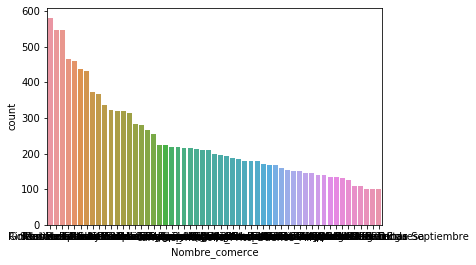

In [ ]:
#Graficas
res= DS_peliculas_rating.groupBy('Nombre_comerce').count().orderBy('count',ascending=False)
red=res.toPandas()

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

ax=sns.barplot(x="Nombre_comerce", y="count", data=red)

In [ ]:
# Peliculas con menos numero de visualizaciones 
DS_peliculas_rating.groupBy('Nombre_comerce').count().orderBy('count',ascending=True).show(10,False)

+-------------------------------------+-----+
|Nombre_comerce                       |count|
+-------------------------------------+-----+
|Carnitas Mata  Calle 16 de Septiembre|100  |
|cafe ambar                           |100  |
|la perica hamburguesa                |102  |
|tortas hawai                         |109  |
|puesto de gorditas                   |109  |
|churchs                              |126  |
|TACOS EL GUERO                       |133  |
|Arrachela Grill                      |135  |
|el pueblito                          |136  |
|Los Vikingos                         |141  |
+-------------------------------------+-----+
only showing top 10 rows



In [ ]:
# Peliculas con menos numero de visualizaciones 
DS_peliculas_rating.groupBy('Nombre_comerce','Distrito').count().orderBy('count',ascending=False).show(10,False)

+-------------------------------+--------------+-----+
|Nombre_comerce                 |Distrito      |count|
+-------------------------------+--------------+-----+
|Rincon Huasteco                |0             |581  |
|Gordas de morales              |0             |548  |
|crudalia                       |0             |547  |
|Mariscos Tia Licha             |cuernavaca    |467  |
|Sanborns Casa Piedra           |cuernavaca    |460  |
|Subway                         |cuernavaca    |438  |
|Restaurant Las Mananitas       |cuernavaca    |432  |
|Little Cesarz                  |CiudadVictoria|373  |
|pizza clasica                  |soledad       |367  |
|Restaurante la Estrella de Dima|soledad       |338  |
+-------------------------------+--------------+-----+
only showing top 10 rows



# 3. Feature Engineering: Tansforma pelicula a numero



In [ ]:
# Importando el codifocador
from pyspark.ml.feature import StringIndexer,IndexToString

In [ ]:
# Configurando la Numerzación los titulos de las peliculas
# title_new = La codificación de las peliculas
stringIndexer = StringIndexer(inputCol="Nombre_comerce", outputCol="Nombre_comerce_new")

In [ ]:
#Aplicando la numerización de peliculas
model = stringIndexer.fit(DS_peliculas_rating)

In [ ]:
#Creando un nuevo Dataframe con el indexado creado
indexed = model.transform(DS_peliculas_rating)

In [ ]:
#Revision de los indices
#Ya tenemos las 3 cosas que necesitamos... codigo de cliente... codigo de producto y valoracion
indexed.show(10)

+------+----------+-------+--------------------+--------------+------+-----------+--------------+------------+------------------+
|userID|userID_cod|placeID|      Nombre_comerce|      Distrito|rating|food_rating|service_rating|rating_total|Nombre_comerce_new|
+------+----------+-------+--------------------+--------------+------+-----------+--------------+------------+------------------+
| U1068|         2| 135104|                vips|             0|     1|          1|             2|           4|              21.0|
| U1068|         2| 132740|Carreton de Flaut...|CiudadVictoria|     0|          0|             0|           0|              17.0|
| U1068|         2| 132663|           tacos abi|CiudadVictoria|     1|          1|             1|           3|              27.0|
| U1068|         2| 132732|  Taqueria EL amigo |CiudadVictoria|     0|          0|             0|           0|              22.0|
| U1068|         2| 132630|          palomo tec|CiudadVictoria|     1|          1|        

In [ ]:
#Numero de veces que cada titulo ha aparecido
indexed.groupBy('Nombre_comerce_new').count().orderBy('count',ascending=False).show(10,False)

+------------------+-----+
|Nombre_comerce_new|count|
+------------------+-----+
|0.0               |581  |
|1.0               |548  |
|2.0               |547  |
|3.0               |467  |
|4.0               |460  |
|5.0               |438  |
|6.0               |432  |
|7.0               |373  |
|8.0               |367  |
|9.0               |338  |
+------------------+-----+
only showing top 10 rows



# 4. Dividiendo la data en muestra de entrenamiento y validacion


In [ ]:
#4.1  Data de entrenamiento y validacion
train,test=indexed.randomSplit([0.8,0.2], seed = 1234)

In [ ]:
# Nro de entrenamiento
train.count()

10506

In [ ]:
# Nro de Validacion
test.count()

2613

# 5. Entrenando el Modelo


In [ ]:
#Importando el modelo Recomendador ALS
from pyspark.sql.functions import *
from pyspark.ml.recommendation import ALS


In [ ]:
#Configuracion del Entrenamiento del modelo Recomendador usando la muetsra de entrenamiento
rec = ALS(
    maxIter=20,
    regParam=0.0025,
    userCol='userID_cod',
    itemCol='Nombre_comerce_new',
    ratingCol='rating_total',
    nonnegative=True,
    coldStartStrategy="drop",
    implicitPrefs=False, 
    seed=1234
  )

# maxIter: El maximo de iteraciones
# regParam: Parametro de Regularización
# nonnegative: Especificar si se utiliza una restriccion negativa en los Minimos cuadrados
# coldStartStrategy: Parametro que elimina cualquier cliente que no tenga informacion
# implicitPrefs: Si es implicito hace referencia a feedback no registrado voluntariamente por el cliente

In [ ]:
#Entrenando el modelo
rec_model=rec.fit(train)

In [ ]:
#Haciendo las predicciones en la data de test 
predicted_ratings=rec_model.transform(test)

In [ ]:
#Revisando los pronostico
predicted_ratings.printSchema()

root
 |-- userID: string (nullable = true)
 |-- userID_cod: integer (nullable = true)
 |-- placeID: integer (nullable = true)
 |-- Nombre_comerce: string (nullable = true)
 |-- Distrito: string (nullable = true)
 |-- rating: integer (nullable = true)
 |-- food_rating: integer (nullable = true)
 |-- service_rating: integer (nullable = true)
 |-- rating_total: integer (nullable = true)
 |-- Nombre_comerce_new: double (nullable = false)
 |-- prediction: float (nullable = false)



In [ ]:
# Revision rapida de los pronosticos
predicted_ratings.orderBy(rand()).show(10)

+------+----------+-------+--------------------+--------------+------+-----------+--------------+------------+------------------+----------+
|userID|userID_cod|placeID|      Nombre_comerce|      Distrito|rating|food_rating|service_rating|rating_total|Nombre_comerce_new|prediction|
+------+----------+-------+--------------------+--------------+------+-----------+--------------+------------+------------------+----------+
| U1037|        63| 132830|     Rincon Huasteco|             0|     2|          2|             2|           6|               0.0|  5.999773|
| U1040|        85| 135019|Restaurant Bar Co...|      jiutepec|     1|          2|             1|           4|              13.0| 3.9995737|
| U1035|        36| 134986|Restaurant Las Ma...|    cuernavaca|     2|          2|             2|           6|               6.0| 5.9955697|
| U1060|        11| 132717|        tortas hawai|             0|     2|          2|             2|           6|              50.0| 5.9997654|
| U1027|     

In [ ]:
# Generando los top 10 peliculas sugeridas por cada cliente
userRecs = rec_model.recommendForAllUsers(10)

In [ ]:
userRecs.show(5, False)

+----------+----------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|userID_cod|recommendations                                                                                                                                                       |
+----------+----------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|31        |[[29, 5.0031385], [47, 4.9986134], [11, 4.927722], [3, 4.2605534], [6, 4.2034225], [16, 3.9975922], [36, 3.7637312], [23, 3.7021637], [7, 3.5104446], [21, 3.4378517]]|
|85        |[[28, 6.4530106], [19, 5.9974003], [9, 5.342147], [1, 5.255717], [33, 5.0669317], [52, 4.9181347], [43, 4.7833295], [25, 4.354413], [45, 4.308901], [13, 3.9995737]]  |
|137       |[[7, 6.012292], [29, 5.687024], [28, 5.2054057], [49, 5.19627], [24, 5.17414], [8, 5.172

# 5. Evaluación del poder predictivo del modelo


In [ ]:
# Creando la columna diferencia del pronostico
predicted_ratings_witherr = predicted_ratings.withColumn(
    'err', abs(predicted_ratings.prediction - predicted_ratings.rating_total)
)

predicted_ratings_witherr.show()

+------+----------+-------+----------------+----------+------+-----------+--------------+------------+------------------+----------+-----------+
|userID|userID_cod|placeID|  Nombre_comerce|  Distrito|rating|food_rating|service_rating|rating_total|Nombre_comerce_new|prediction|        err|
+------+----------+-------+----------------+----------+------+-----------+--------------+------------+------------------+----------+-----------+
| U1117|        31| 135018|El Oceano Dorado|cuernavaca|     1|          1|             1|           3|              31.0|  3.000008|8.106232E-6|
| U1117|        31| 135018|El Oceano Dorado|cuernavaca|     1|          1|             1|           3|              31.0|  3.000008|8.106232E-6|
| U1117|        31| 135018|El Oceano Dorado|cuernavaca|     1|          1|             1|           3|              31.0|  3.000008|8.106232E-6|
| U1117|        31| 135018|El Oceano Dorado|cuernavaca|     1|          1|             1|           3|              31.0|  3.00000

In [ ]:
# Distribución de las valoraciones
predicted_ratings.groupBy('rating_total').count().orderBy('rating_total',ascending=True).show()

+------------+-----+
|rating_total|count|
+------------+-----+
|           0|  462|
|           1|   71|
|           2|  172|
|           3|  472|
|           4|  371|
|           5|  307|
|           6|  758|
+------------+-----+



In [ ]:
# Error promedio por rating de valoracion
predicted_ratings_witherr.groupBy('rating_total').agg({'err':'mean'}).orderBy('rating_total',ascending=True).show()

+------------+--------------------+
|rating_total|            avg(err)|
+------------+--------------------+
|           0| 0.02166237588153308|
|           1|0.002977855608496...|
|           2|0.011740473813788836|
|           3|0.003409736742407...|
|           4|0.003507254901279...|
|           5|0.002554961835134...|
|           6|0.006400958214712017|
+------------+--------------------+



In [ ]:
# Error promedio por rating de valoracion
predicted_ratings_witherr.groupBy('rating_total').agg({'err':'std'}).orderBy('rating_total',ascending=True).show()

+------------+--------------------+
|rating_total|         stddev(err)|
+------------+--------------------+
|           0| 0.03802516005332337|
|           1|0.005016005382276728|
|           2|0.022258780301222428|
|           3|0.006977186403528546|
|           4|0.006855563473575...|
|           5|0.003740077978221869|
|           6|0.010050598183746616|
+------------+--------------------+



In [ ]:
#Importando el evaluador de Regresion RMSE 
from pyspark.ml.evaluation import RegressionEvaluator

In [ ]:
#Evluando la presición del pronostico
evaluator=RegressionEvaluator(metricName='rmse',predictionCol='prediction',labelCol='rating_total')

In [ ]:
#Evluando el error de pronostico global
rmse=evaluator.evaluate(predicted_ratings)

In [ ]:
#Imprimiento el error
print(rmse)

0.02105488076326083


# 6. Recomendandor de peliculas, ya listo!

In [ ]:
#Listado de peliculas unicas
unique_movies=indexed.select('Nombre_comerce_new').distinct()

In [ ]:
#Total de peliculas
unique_movies.count()

55

In [ ]:
#Asignando un alias {a} la lista unica de peliculas
a = unique_movies.alias('a')

In [ ]:
# Eligiendo un cliente
user_id=31

# Creando una tabla que contiene una pelicula por usuario
watched_movies=indexed.filter(indexed['userID'] == user_id).select('Nombre_comerce_new').distinct()

#Numero de peliculas ya evaluadas 
watched_movies.count()

0

In [ ]:
# Asignando un alias  {b} ha peliculas que el usuario ya vio de la tabla
b=watched_movies.alias('b')

In [ ]:
#Cruzando ambas tablas
total_movies = a.join(b, a.Nombre_comerce_new == b.Nombre_comerce_new,how='left')

In [ ]:
total_movies.show(10,False)

+------------------+------------------+
|Nombre_comerce_new|Nombre_comerce_new|
+------------------+------------------+
|8.0               |null              |
|0.0               |null              |
|7.0               |null              |
|49.0              |null              |
|29.0              |null              |
|47.0              |null              |
|42.0              |null              |
|44.0              |null              |
|35.0              |null              |
|18.0              |null              |
+------------------+------------------+
only showing top 10 rows



In [ ]:
# Seleccionando peliculas que el cliente aun no ha mirado
remaining_movies=total_movies.where(col("b.Nombre_comerce_new").isNull()).select(a.Nombre_comerce_new).distinct()

In [ ]:
remaining_movies.show()

+------------------+
|Nombre_comerce_new|
+------------------+
|               8.0|
|               0.0|
|               7.0|
|              49.0|
|              29.0|
|              47.0|
|              42.0|
|              44.0|
|              35.0|
|              18.0|
|               1.0|
|              39.0|
|              34.0|
|              37.0|
|              25.0|
|              36.0|
|              41.0|
|               4.0|
|              23.0|
|              50.0|
+------------------+
only showing top 20 rows



In [ ]:
# Numero de peliculas que los usuario aun no lo ven 
remaining_movies.count()

55

In [ ]:
# Agregando una nueva columna del usuario 
remaining_movies=remaining_movies.withColumn("userID_cod",lit(int(user_id)))

In [ ]:
remaining_movies.show(10,False)

+------------------+----------+
|Nombre_comerce_new|userID_cod|
+------------------+----------+
|8.0               |31        |
|0.0               |31        |
|7.0               |31        |
|49.0              |31        |
|29.0              |31        |
|47.0              |31        |
|42.0              |31        |
|44.0              |31        |
|35.0              |31        |
|18.0              |31        |
+------------------+----------+
only showing top 10 rows



In [ ]:
# Haciendo la recomendacion de peliculas utilizando el modelo recomendador ALS y seleccionado solo las mejores top {n} peliculas
recommendations=rec_model.transform(remaining_movies).orderBy('prediction',ascending=False)

In [ ]:
recommendations.show(5,False)

+------------------+----------+----------+
|Nombre_comerce_new|userID_cod|prediction|
+------------------+----------+----------+
|29.0              |31        |5.0031385 |
|47.0              |31        |4.9986134 |
|11.0              |31        |4.927722  |
|3.0               |31        |4.2605534 |
|6.0               |31        |4.2034225 |
+------------------+----------+----------+
only showing top 5 rows



In [ ]:
# Consiguiendo los de las peliculas sugeridas
movie_title = IndexToString(inputCol="Nombre_comerce_new", outputCol="title",labels=model.labels)

final_recommendations=movie_title.transform(recommendations)

In [ ]:
final_recommendations.show(10,False)

+------------------+----------+----------+-------------------------------------+
|Nombre_comerce_new|userID_cod|prediction|title                                |
+------------------+----------+----------+-------------------------------------+
|29.0              |31        |5.0031385 |El cotorreo                          |
|47.0              |31        |4.9986134 |Arrachela Grill                      |
|11.0              |31        |4.927722  |Vips                                 |
|3.0               |31        |4.2605534 |Mariscos Tia Licha                   |
|6.0               |31        |4.2034225 |Restaurant Las Mananitas             |
|16.0              |31        |3.9975922 |Cafeteria cenidet                    |
|36.0              |31        |3.7637312 |carnitas mata calle Emilio Portes Gil|
|23.0              |31        |3.7021637 |Hamburguesas La perica               |
|7.0               |31        |3.5104446 |Little Cesarz                        |
|21.0              |31      

# 7. Construyendo las funcion que sugiera una pelicula recomendada segun el modelo recomendador

In [ ]:
# Funcion para recomendar las top n peliculas para cualquier usuario
def top_movies(user_id,n):
    """
    This function returns the top 'n' movies that user has not seen yet but might like 
    
    """
    # Asignación de una lista de peliculas unicas a
    a = unique_movies.alias('a')
    
    # Creando otra tabla que contiene las peliculas que ya vio el usuario
    watched_movies=indexed.filter(indexed['userID_cod'] == user_id).select('Nombre_comerce_new')
    
    # Asignanción de tabla de peliculas b de peliculas ya vistas 
    b=watched_movies.alias('b')
    
    # Cruce de ambas tablas
    total_movies = a.join(b, a.Nombre_comerce_new == b.Nombre_comerce_new,how='left')
    
    # Seleccionando peliculas que el usuario no ha visto aun 
    remaining_movies=total_movies.where(col("b.Nombre_comerce_new").isNull()).select(a.Nombre_comerce_new).distinct()
        
    #Agregando una nueva columan del cliente  
    remaining_movies=remaining_movies.withColumn("userID_cod",lit(int(user_id)))
    
    # REalizando la recomendnado de peliculas mas adecuada utilizando el Sistema de recomendador del modelo ALS y seleccionando las mejores peliculas
    recommendations=rec_model.transform(remaining_movies).orderBy('prediction',ascending=False).limit(n)

    # Agregando los titulos de las peliculas en texto   
    movie_title = IndexToString(inputCol="Nombre_comerce_new", outputCol="title",labels=model.labels)
    final_recommendations=movie_title.transform(recommendations)
    
    # Entregando los titutlos recomendado por usuario
    return final_recommendations.show(n,False)


In [ ]:
# REvision del clientes y las 10 peliculas sugeridas para el cliente
top_movies(77,10)

+------------------+----------+----------+-----+
|Nombre_comerce_new|userID_cod|prediction|title|
+------------------+----------+----------+-----+
+------------------+----------+----------+-----+



In [ ]:
DS_peliculas_rating.filter(DS_peliculas_rating['userId']=='8').show()

+------+----------+-------+--------------+--------+------+-----------+--------------+------------+
|userID|userID_cod|placeID|Nombre_comerce|Distrito|rating|food_rating|service_rating|rating_total|
+------+----------+-------+--------------+--------+------+-----------+--------------+------------+
+------+----------+-------+--------------+--------+------+-----------+--------------+------------+



In [ ]:
# El cliente 450 que revisa Star Wars
# DS_peliculas_rating.filter((DS_peliculas_rating['rating']>4)&(DS_peliculas_rating['userId']=='450')).show()
# REvision del clientes y las 10 peliculas sugeridas para el cliente
top_movies(8,10)

+------------------+----------+----------+----------------------------------------------------+
|Nombre_comerce_new|userID_cod|prediction|title                                               |
+------------------+----------+----------+----------------------------------------------------+
|31.0              |8         |0.0       |El Oceano Dorado                                    |
|53.0              |8         |0.0       |cafe ambar                                          |
|34.0              |8         |0.0       |palomo tec                                          |
|28.0              |8         |0.0       |cafe punta del cielo                                |
|26.0              |8         |0.0       |Restaurant and Bar and Clothesline Carlos N Charlies|
|44.0              |8         |0.0       |Rincon del Bife                                     |
|12.0              |8         |0.0       |Restaurant Familiar El Chino                        |
|22.0              |8         |0.0      

In [ ]:
# REvision del clientes y las 10 peliculas sugeridas para el cliente
top_movies(450,15)

+------------------+----------+----------+-----+
|Nombre_comerce_new|userID_cod|prediction|title|
+------------------+----------+----------+-----+
+------------------+----------+----------+-----+

